# # Model: Adaboost

### Author: Ehsan Gharib-Nezhad



<a id='intro'></a>

## Boosting as an Ensemble Method

---

Boosting is another ensemble method with a different approach to bagging. Boosting takes a weak base learner and tries to make it a strong learner by retraining it on the misclassified samples.

1) **Base model fitting is an iterative procedure**: It cannot be run in parallel.
- **Weights are assigned to observations to indicate their "importance:"** Samples with higher weights are given higher influence on the total error of the next model, prioritizing those observations.
- **Weights change at each iteration with the goal of correcting the errors/misclassifications of the previous iteration**: The first base estimator is fit with uniform weights on the observations.
- **Final prediction is typically constructed by a weighted vote**: Weights for each base model depend on their training errors or misclassification rates.

In [1]:
from myfunctions import *

# # Import Bagging Classifier.
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler


from sklearn.feature_extraction.text import CountVectorizer
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV


In [25]:
df = pd.read_csv('../datasets/text_processed_all_posts_combined_imbalanced.csv',index_col=0)
is_balanced = False # set True is the dataset is balanced!!! 

In [26]:
df.head()

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,timestamp,post,token,is_Covid19positive
0,I am constantly seeing people asking about people’s experiences so I figured now we can go to one place and stop spamming the AMA and ask Reddit’s subs.,For those that have tested positive I hope every single one of you feels better soon!,COVID19positive,1584148032,the1andonlyjoja,191,1,True,2020-03-13 18:07:12,tested positive hope every single one feels better soon,test posit hope everi singl one feel better soon,1
1,How severe are your guys' symptoms?,"I have no idea if I've got the coronavirus, or it's just a cold etc. I've got a runny nose and coughing quite a lot, and a bit of a headache. I don't want to go out in case I do have it and I give it to other people. Are your symptoms debilitating?",COVID19positive,1584358828,RocketFrasier,0,1,True,2020-03-16 04:40:28,idea got coronavirus cold etc got runny nose coughing quite lot bit headache want go case give people symptoms debilitating,idea got coronaviru cold etc got runni nose cough quit lot bit headach want go case give peopl symptom debilit,1
2,How severe are your symptoms?,"I have no idea if I've got the coronavirus, or it's just a cold etc. I've got a runny nose and coughing quite a lot, and a bit of a headache. I don't want to go out in case I do have it and I give it to other people. My symptoms feel practically the same as a normal cold/flu, other than last night where my eyes hurt a bit, so I wasn't able to sleep. Are your symptoms debilitating?",COVID19positive,1584358937,RocketFrasier,42,1,True,2020-03-16 04:42:17,idea got coronavirus cold etc got runny nose coughing quite lot bit headache want go case give people symptoms feel practically normal cold flu last night eyes hurt bit able sleep symptoms debilitating,idea got coronaviru cold etc got runni nose cough quit lot bit headach want go case give peopl symptom feel practic normal cold flu last night eye hurt bit abl sleep symptom debilit,1
3,Shortness of breath as first symptom?,"I live in a Canadian province with only 3 presumed cases, all related to travel. I haven’t travelled outside my city, and haven’t been in contact with anyone who has a known case of covid19. However, 11 days ago I was interacting with someone who travelled from the US and had been travelling in international airports. \n\nI’m 21F and feel like I’m experiencing shortness of breath, but unsure b...",COVID19positive,1584375181,_haligirl98_,77,1,True,2020-03-16 09:13:01,live canadian province presumed cases related travel travelled outside city contact anyone known case covid however days ago interacting someone travelled us travelling international airports f feel like experiencing shortness breath unsure never felt way felt slight pressure tightness right side chest feel like get much air lungs usual pains sharp feelings yet fever cough headache symptom rea...,live canadian provinc presum case relat travel travel outsid citi contact anyon known case covid howev day ago interact someon travel us travel intern airport f feel like experienc short breath unsur never felt way felt slight pressur tight right side chest feel like get much air lung usual pain sharp feel yet fever cough headach symptom read stori peopl symptom seem start least fever cough sh...,1
4,"I need advice, please!","Yesterday I woke up and noticed I had a shortness of breath a few hours after waking up. At work I went home early because I felt weak/tired. \n\nThis morning, I don’t feel as weak anymore, but I still have the shortness of breath and slight chest pain. Could this be allergies? Did any of you have these symptoms?\n\nI called my doctors and they will not test me unless I have a cough with a fev...",COVID19positive,1584382909,monkcell,11,2,True,2020-03-16 11:21:49,yesterday woke noticed shortness breath hours waking work went home early felt weak tired morning feel weak anymore still shortness breath slight chest pain could allergies symptoms call

### Set up X and Y

In [27]:
X = df['token']
y = df['is_Covid19positive']

In [28]:
#check baseline:

y.value_counts(normalize = True)

1    0.929286
0    0.070714
Name: is_Covid19positive, dtype: float64

# train test split

In [29]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [30]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(1    0.929273
 0    0.070727
 Name: is_Covid19positive, dtype: float64,
 1    0.929322
 0    0.070678
 Name: is_Covid19positive, dtype: float64)

##  Count Vectorizer


In [31]:
cvec = CountVectorizer()

In [32]:
Xcv_train = cvec.fit_transform(X_train)
Xcv_test = cvec.transform(X_test)

# ======================================================
## For imbalanced case

In [33]:
ros = RandomOverSampler()

Xcv_train , y_train = ros.fit_resample(Xcv_train, y_train)

In [34]:
#create a dataframe for our X_train_cv to use later:

df_X_train = pd.DataFrame(Xcv_train.todense(), columns=cvec.get_feature_names())
df_X_train

,aa,aaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaachooooooo,aaaand,aaargh,ab,aback,abain,abandon,...,zpak,zucchini,zuchinni,zuckersaid,zuid,zurich,zybio,zyrtec,zz,zzzquil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Adaboost

In [35]:
ada = AdaBoostClassifier()

In [36]:
ada.fit(Xcv_train, y_train)

AdaBoostClassifier()

Score on training set: 0.9313020110957004
Score on testing set: 0.9208650477226048
              precision    recall  f1-score   support

           0       0.47      0.91      0.62       585
           1       0.99      0.92      0.96      7692

    accuracy                           0.92      8277
   macro avg       0.73      0.92      0.79      8277
weighted avg       0.96      0.92      0.93      8277



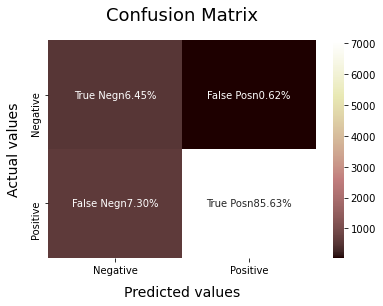

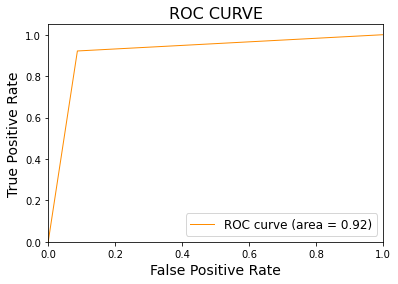

In [37]:
# Evaluate model.

model_Evaluate(ada, Xcv_train, Xcv_test, y_train, y_test)

In [38]:
save_model_Evaluate_values(ada, Xcv_train, Xcv_test, y_train, y_test,  
                               model_name = 'Adaboost', 
                               balanced = is_balanced)

(   score   metric     model balanced
 0   0.93  R_train  Adaboost       no
 1   0.92   R_test  Adaboost       no,
    is_pandemicPreps  is_covid19positive     metric     model balanced
 0              0.47                0.99  precision  Adaboost       no
 1              0.91                0.92     recall  Adaboost       no
 2              0.62                0.96     fscore  Adaboost       no
 3            585.00             7692.00    support  Adaboost       no,
    score     metric     model balanced
 0   0.06   True Neg  Adaboost       no
 1   0.01  False Pos  Adaboost       no
 2   0.07  False Neg  Adaboost       no
 3   0.86   True Pos  Adaboost       no)

# Feature Importnace

In [39]:
f = {'Feature Name':df_X_train.columns,'Feature Importance':ada.feature_importances_}
et_fi = pd.DataFrame(f)

et_fi.sort_values(by=['Feature Importance'], ascending = False).head(20)

,Feature Name,Feature Importance
16838,symptom,0.04
5585,enough,0.02
3646,contract,0.02
13187,posit,0.02
1962,bodi,0.02
14109,recov,0.02
4248,day,0.02
17199,test,0.02
9645,left,0.02
18603,vaccin,0.02


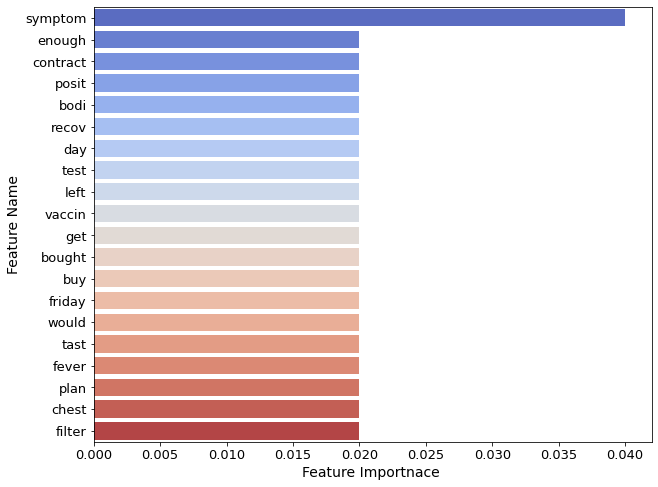

In [40]:
plt.figure( figsize=(10,8))
sns.barplot(x='Feature Importance',y='Feature Name', 
            data=et_fi.sort_values(by='Feature Importance', ascending=False).iloc[0:20],
            palette='coolwarm')
plt.xlabel('Feature Importnace ',fontsize=14)
plt.ylabel('Feature Name', fontsize = 14)
plt.tick_params('both', labelsize = 13)

# ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

##  GridSearchCV

In [41]:
params = {
    'n_estimators'  : [50, 100],
    'learning_rate' : [.8, .9, 1.0]
}

In [42]:
gs = GridSearchCV(AdaBoostClassifier(), params, cv = 3)

In [43]:
gs.fit(Xcv_train, y_train )

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.8, 0.9, 1.0],
                         'n_estimators': [50, 100]})

In [44]:
gs.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

Score on training set: 0.9473821081830791
Score on testing set: 0.9397124562039386
              precision    recall  f1-score   support

           0       0.54      0.91      0.68       585
           1       0.99      0.94      0.97      7692

    accuracy                           0.94      8277
   macro avg       0.77      0.92      0.82      8277
weighted avg       0.96      0.94      0.95      8277



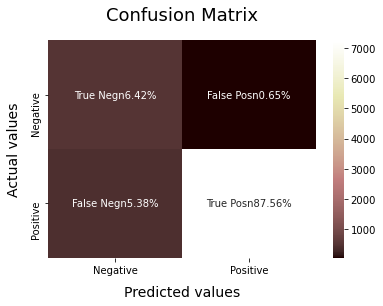

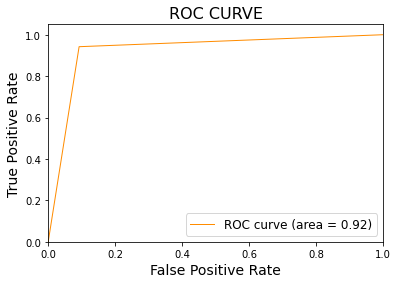

In [45]:
# Evaluate model.

model_Evaluate(gs, Xcv_train, Xcv_test, y_train, y_test)

In [46]:
save_model_Evaluate_values(gs, Xcv_train, Xcv_test, y_train, y_test,  
                             model_name='Adaboost-GridSearchCV',
                             balanced = is_balanced)

(   score   metric                  model balanced
 0   0.95  R_train  Adaboost-GridSearchCV       no
 1   0.94   R_test  Adaboost-GridSearchCV       no,
    is_pandemicPreps  is_covid19positive     metric                  model  \
 0              0.54                0.99  precision  Adaboost-GridSearchCV   
 1              0.91                0.94     recall  Adaboost-GridSearchCV   
 2              0.68                0.97     fscore  Adaboost-GridSearchCV   
 3            585.00             7692.00    support  Adaboost-GridSearchCV   
 
   balanced  
 0       no  
 1       no  
 2       no  
 3       no  ,
    score     metric                  model balanced
 0   0.06   True Neg  Adaboost-GridSearchCV       no
 1   0.01  False Pos  Adaboost-GridSearchCV       no
 2   0.05  False Neg  Adaboost-GridSearchCV       no
 3   0.88   True Pos  Adaboost-GridSearchCV       no)